Create an ipython notebook to provide a tutorial showing the steps to perform dimensional reduction using https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka as the basis and a dataset of your choosing :
Your tutorial will  include

1. a short description of what is the dimensionality of the data and why and how to pick the dimensions for use

2, Initial Data setup

3. Dimensional reduction process

4. Display in graph and plots

5. Discussion of the images in the graphs and plots

6. Bibliography ( urls and names of pages and authors of used code and descriptions )  Be sure to put in 

  You should submit your ipython notebook url in your github account or zip your homework9 directory and  submit it.

Be sure that if someone downloads your directory the notebook will run as shown.  So any scripts or images used in the notebook

are local to the directory of the notebook.  You must have citations and references marked in the text.  You can use http://www.citationmachine.net  to help standardize your references at the end of you document

For more credit continue with the cluster analysis of the dimensionally reduced code

## Dimensionality Reduction (PCA)
When a data set has too many variables, it is often the case that some of the variables are not useful for analysis and some of them might be correlated. So, if we use these correlated variables together in our analysis, our predictions might go wrong. So, we might want to use only the "very important" variables for the analysis. So, in order to help with these issues, there are a couple of statistical techniques such as Factor Analysis, Principal Component Analysis (PCA).

#### Load the "diabetes" dataset
There are 768 instances and 8 attributes. The attributes of this dataset are as follows: <br>

Pregnancies: Number of times pregnant<br>
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
BloodPressure: Diastolic blood pressure (mm Hg)<br>
SkinThickness: Triceps skin fold thickness (mm)<br>
Insulin: 2-Hour serum insulin (mu U/ml) <br>
BMI: Body mass index (weight in kg/(height in m)^2)<br>
DiabetesPedigreeFunction: Diabetes pedigree function<br>
Age: Age (years)<br>
Outcome: Class variable (0 or 1)<br>

In [213]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Load data set
diabetes = pd.read_csv("data/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Check the datatypes of the attributes in the dataset

In [214]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Check if there are any missing values

In [215]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Count the number of patients tested positive/negative for diabetes
There are 268 patients who aretested positive and 500 patients are tested negative for diabetes

In [216]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Basic Exploratory Analysis (Statistical Analysis) of the dataset

In [217]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Define attributes for PCA implementation
We need the first 8 attributes for PCA, by which we try to reduce the dimensions

In [218]:
X = diabetes.iloc[:,0:8]

#### Define categorical attribute
The last attribute is 'Outcome' which is categorical 

In [219]:
y = diabetes.iloc[:,8]

#### Standardize the attributes to have mean 0 and variance 1

In [220]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

#### Transform data into first two principal components (n=2)
We specify in advance the number of principal components we want to use. We will then get a lower dimension representation of our dataframe, as a numpy array.

In [221]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_std)

#### The shape of the original and reduced datasets

In [222]:
print("Original Data Shape: %s" % str(X_std.shape))
print("Reduced Data Shape: %s" % str(reduced_X.shape))

Original Data Shape: (768, 8)
Reduced Data Shape: (768, 2)


#### The principal components of the 8 attributes

In [223]:
print(pca.components_)

[[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]]


#### Variance Explained by Principal Components
We observe that first PC already explains 26.17% of the variance, while the second one accounts for 21.64% for a total of 47.81% between the two of them. Ideally, we need to take all PC components that explain about 90% of the variance to get a better representation of the data. But, here I took only 2 as it is easy to visualize the data.

In [224]:
print('Explained Variance Ratio (2 Components): %s' %
str(pca.explained_variance_ratio_))
print('Cumulative Explained Variance (2 Components): %s' %
str(sum(pca.explained_variance_ratio_)))

Explained Variance Ratio (2 Components): [ 0.26179749  0.21640127]
Cumulative Explained Variance (2 Components): 0.478198760739


#### Load the principal components into a dataframe 

In [225]:
reduced_X = pd.DataFrame(reduced_X)
reduced_X.index = reduced_X.index
reduced_X.columns = ['PC1','PC2']
reduced_X.head()

,PC1,PC2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


#### Plot the first 2 Principal Components

<IPython.core.display.Javascript object>


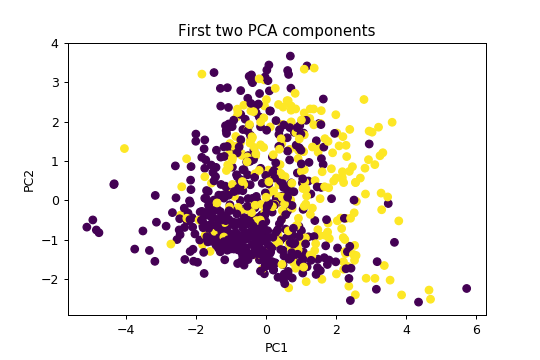

In [226]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_X.iloc[:, 0], reduced_X.iloc[:, 1], c=y, cmap='viridis')

ax.set_title("First two PCA components")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

plt.show()

## Clustering Analysis
#### Determine the number of clusters (with Elbow Method)
K-means is an unsupervised machine learning algorithm that groups a dataset into a user-specified number (k) of clusters. The algorithm clusters the data into k clusters, even if k is not the right number of clusters to use. So, when using k-means clustering, we need a way to determine whether they are using the right number of clusters. So, we use the elbow method to determine the optimal number of clusters for k-means clustering. As the Within Sum of Squares (WSS) does not reduce much after cluster 3, we choose k=3 clusters for clustering this dataset. <br>

We don't need to compute the within-cluster SSE explicitly, as it is already accessible through the inertia_ attribute after fitting a KMeans model.

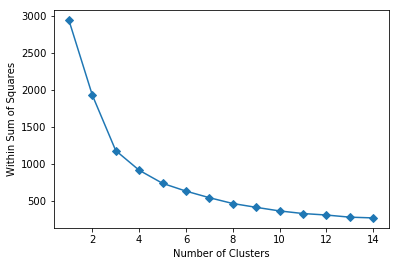

In [227]:
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

wss = []

for i in range(1, 15):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(reduced_X)
    wss.append(km.inertia_)
    
plt.plot(range(1,15), wss, marker='D')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares')
plt.show()

#### Cluster Analysis of 2 Principal Components into 2 clusters
With more time, KMeans will always converge, however this may be to a local minimum. This depends on the initialization of the centroids. So, the default "k-means++" initialization scheme, has been implemented. This method generally initializes the centroids to be far from each other, which gives better results than random initialization.<br>

Ideally, we should initialize 3 clusters, but as we already know that the 'Outcome' variable has 2 classes, I just used 2 clusters.

In [228]:
from sklearn.cluster import KMeans

km_2 = KMeans(n_clusters=2)
km_2.fit(reduced_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

The predicted clusters are obtained and are stored in 'y_pred'

In [229]:
y_pred2 = km_2.predict(reduced_X)
y_pred2

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0,

The coordinates of the cluster centers are obtained below:

In [230]:
centers = km_2.cluster_centers_
centers

array([[-0.32012573, -0.79761443],
       [ 0.57065891,  1.42183442]])

<IPython.core.display.Javascript object>


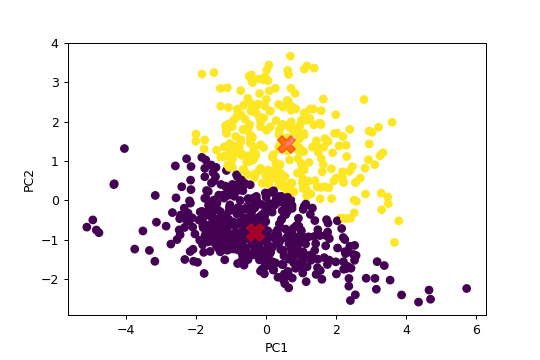

In [231]:
%matplotlib notebook
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_X.iloc[:, 0], reduced_X.iloc[:, 1], c=y_pred2, cmap='viridis')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

ax.scatter(centers[:, 0], centers[:, 1], c='red', marker = 'X', s=200, alpha=0.5)
plt.show()

#### Transform data into first three principal components (n=3)

In [232]:
pca3 = PCA(n_components=3)
reduced_3X = pca3.fit_transform(X_std)

In [233]:
print("Original shape: %s" % str(X_std.shape))
print("Reduced shape: %s" % str(reduced_3X.shape))

Original shape: (768, 8)
Reduced shape: (768, 3)


In [234]:
print('Explained Variance Ratio (3 Components): %s' %
str(pca3.explained_variance_ratio_))
print('Cumulative Explained Variance (3 Components): %s' %
str(sum(pca3.explained_variance_ratio_)))

Explained Variance Ratio (3 Components): [ 0.26179749  0.21640127  0.12870373]
Cumulative Explained Variance (3 Components): 0.606902494387


In [235]:
reduced_3X = pd.DataFrame(reduced_3X)
reduced_3X.index = reduced_3X.index
reduced_3X.columns = ['PC1', 'PC2', 'PC3']
reduced_3X.head()

,PC1,PC2,PC3
0,1.068503,1.234895,0.095930
1,-1.121683,-0.733852,-0.712938
2,-0.396477,1.595876,1.760678
3,-1.115781,-1.271241,-0.663729
4,2.359334,-2.184819,2.963107


To getter a better understanding of interaction of the dimensions, plot the first three PCA dimensions

<IPython.core.display.Javascript object>


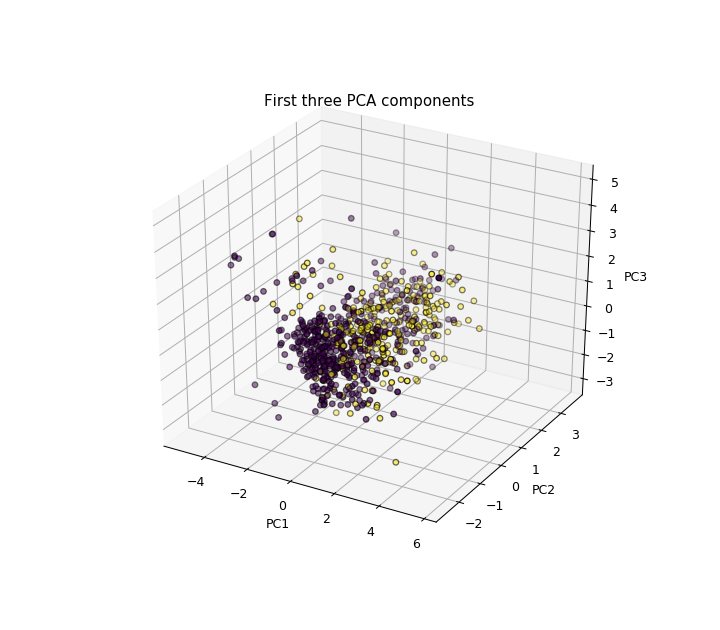

In [257]:
% matplotlib notebook

fig = plt.figure(1, figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_3X.iloc[:, 0], reduced_3X.iloc[:, 1], reduced_3X.iloc[:, 2], edgecolor='k', c=y, cmap='viridis')

ax.set_title("First three PCA components")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

#### Cluster Analysis of 3 Principal Components into 2 clusters

In [237]:
km_3 = KMeans(n_clusters=2)
km_3.fit(reduced_3X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [238]:
y_pred = km_3.predict(reduced_3X)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1,

In [239]:
centers = km_3.cluster_centers_
centers

array([[ 0.53058371,  1.44190542,  0.01311691],
       [-0.29596455, -0.8043083 , -0.00731674]])

Clusters obtained using the predicted labels

<IPython.core.display.Javascript object>


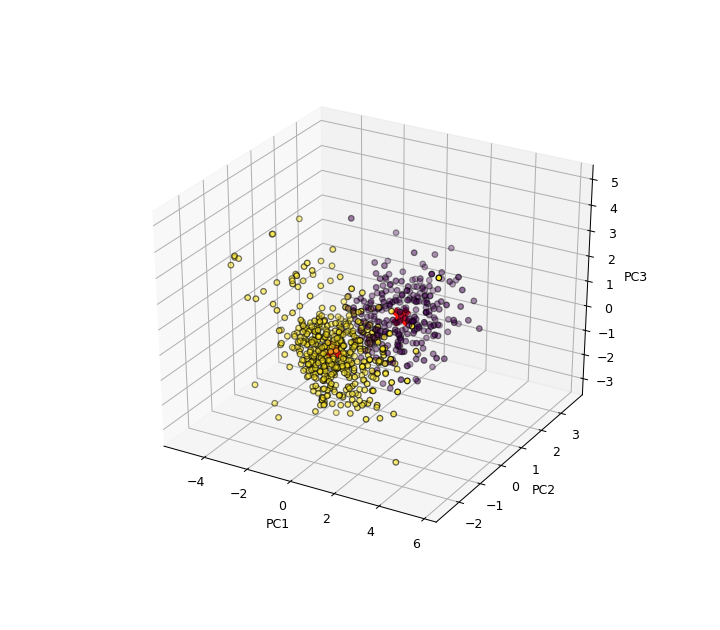

In [240]:
%matplotlib notebook
%matplotlib notebook

fig = plt.figure(1, figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_3X.iloc[:, 0], reduced_3X.iloc[:, 1], reduced_3X.iloc[:, 2], c=y_pred, edgecolor='k', cmap='viridis')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(centers[:, 0], centers[:, 1], c='red', marker = 'X', s=200, alpha=0.9)

#### Transform data into first five principal components (n=5)
We specify in advance the number of principal components we want to use. We will then get a lower dimension representation of our dataframe, as a numpy array.

In [241]:
pca5 = PCA(n_components=5)
reduced_5X = pca5.fit_transform(X_std)

#### Variance Explained by Principal Components (Ideally, components=5 as they explain about 80% of the variance)
We observe that first PC already explains 26.17% of the variance,the second one accounts for 21.64%, third component accounts for 12.87%, and the fourth and fifth for 10.94% and 9.52% respectively, for a total of 81.16% between the 5 of them. 

In [242]:
print('Explained Variance Ratio (5 Components): %s' %
str(pca6.explained_variance_ratio_))
print('Cumulative Explained Variance (5 Components): %s' %
str(sum(pca6.explained_variance_ratio_)))

Explained Variance Ratio (5 Components): [ 0.26179749  0.21640127  0.12870373  0.10944113  0.09529305]
Cumulative Explained Variance (5 Components): 0.811636673056


In [243]:
reduced_5X = pd.DataFrame(reduced_5X)
reduced_5X.index = reduced_5X.index
reduced_5X.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
reduced_5X.head()

,PC1,PC2,PC3,PC4,PC5
0,1.068503,1.234895,0.095930,0.496990,-0.109985
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507
2,-0.396477,1.595876,1.760678,-0.070395,0.906474
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060
4,2.359334,-2.184819,2.963107,4.033099,0.592684


#### Cluster Analysis of 5 Principal Components into 2 clusters

In [244]:
km_5 = KMeans(n_clusters=2)
km_5.fit(reduced_5X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [245]:
y_pred5 = km_5.predict(reduced_5X)
y_pred5

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1,

### Plots of the clusters when various combinations of Principal Components are used 
As the first two Principal Components explain maximum variability, it seems clusters are ideal.

<IPython.core.display.Javascript object>


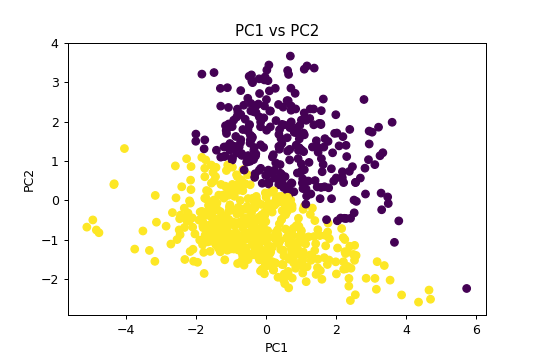

In [246]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_5X.iloc[:, 0], reduced_5X.iloc[:, 1], c=y_pred5, cmap='viridis')

ax.set_title("PC1 vs PC2")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

plt.show()

<IPython.core.display.Javascript object>


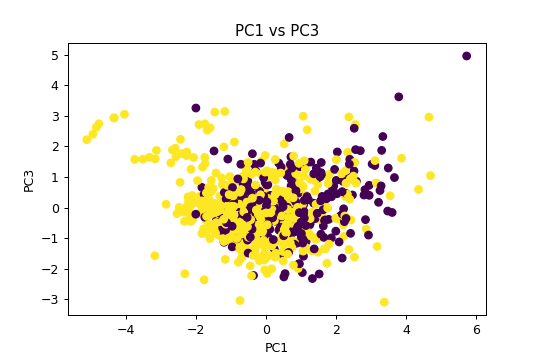

In [247]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_5X.iloc[:, 0], reduced_5X.iloc[:, 2], c=y_pred5, cmap='viridis')

ax.set_title("PC1 vs PC3")
ax.set_xlabel("PC1")
ax.set_ylabel("PC3")

plt.show()

<IPython.core.display.Javascript object>


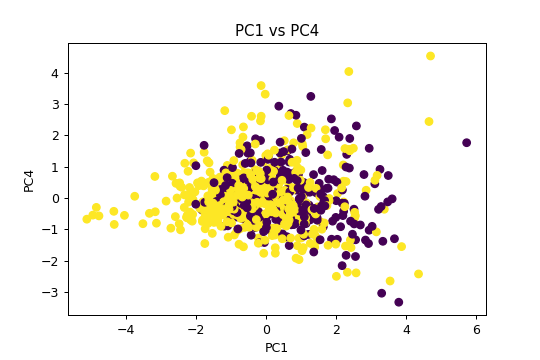

In [248]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_5X.iloc[:, 0], reduced_5X.iloc[:, 3], c=y_pred5, cmap='viridis')

ax.set_title("PC1 vs PC4")
ax.set_xlabel("PC1")
ax.set_ylabel("PC4")

plt.show()

<IPython.core.display.Javascript object>


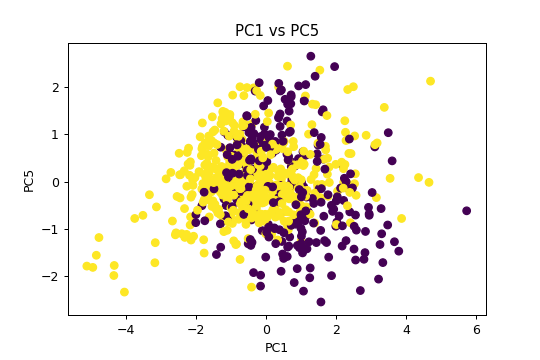

In [249]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_5X.iloc[:, 0], reduced_5X.iloc[:, 4], c=y_pred5, cmap='viridis')

ax.set_title("PC1 vs PC5")
ax.set_xlabel("PC1")
ax.set_ylabel("PC5")

plt.show()

<IPython.core.display.Javascript object>


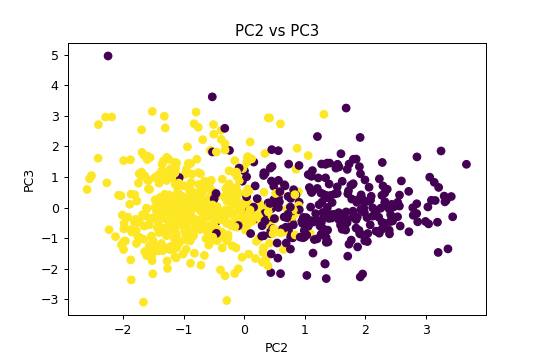

In [250]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_5X.iloc[:, 1], reduced_5X.iloc[:, 2], c=y_pred5, cmap='viridis')

ax.set_title("PC2 vs PC3")
ax.set_xlabel("PC2")
ax.set_ylabel("PC3")

plt.show()

<IPython.core.display.Javascript object>


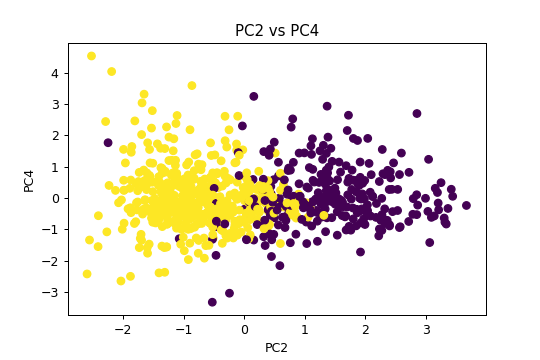

In [251]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_5X.iloc[:, 1], reduced_5X.iloc[:, 3], c=y_pred5, cmap='viridis')

ax.set_title("PC2 vs PC4")
ax.set_xlabel("PC2")
ax.set_ylabel("PC4")

plt.show()

<IPython.core.display.Javascript object>


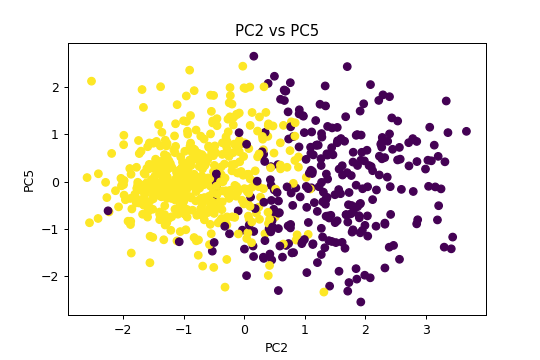

In [252]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_5X.iloc[:, 1], reduced_5X.iloc[:, 4], c=y_pred5, cmap='viridis')

ax.set_title("PC2 vs PC5")
ax.set_xlabel("PC2")
ax.set_ylabel("PC5")

plt.show()

<IPython.core.display.Javascript object>


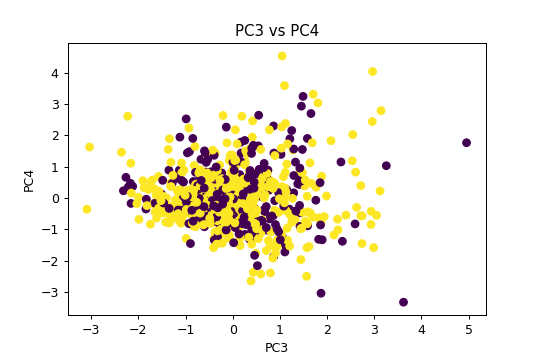

In [253]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_5X.iloc[:, 2], reduced_5X.iloc[:, 3], c=y_pred5, cmap='viridis')

ax.set_title("PC3 vs PC4")
ax.set_xlabel("PC3")
ax.set_ylabel("PC4")

plt.show()

<IPython.core.display.Javascript object>


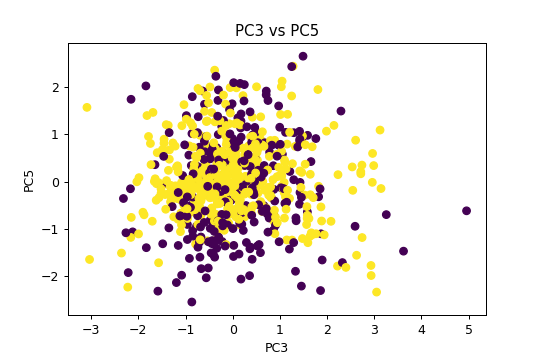

In [254]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_5X.iloc[:, 2], reduced_5X.iloc[:, 4], c=y_pred5, cmap='viridis')

ax.set_title("PC3 vs PC5")
ax.set_xlabel("PC3")
ax.set_ylabel("PC5")

plt.show()

<IPython.core.display.Javascript object>


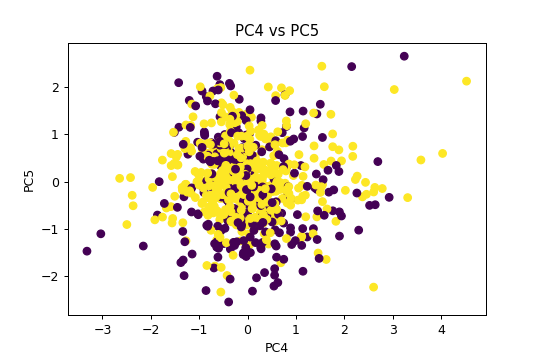

In [255]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_5X.iloc[:, 3], reduced_5X.iloc[:, 4], c=y_pred5, cmap='viridis')

ax.set_title("PC4 vs PC5")
ax.set_xlabel("PC4")
ax.set_ylabel("PC5")

plt.show()

### References

https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/<br>
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data